<a href="https://colab.research.google.com/github/obeabi/Stats/blob/main/Correlations_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from io import IncrementalNewlineDecoder
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy  import stats 
import statsmodels.api as sm
import statsmodels.graphics.api as smg
%matplotlib inline 

print("Libraries installed sucessfully!")

Libraries installed sucessfully!


In [2]:
scipy.__version__

'1.7.3'

## Load dataset

In [3]:
df = pd.read_excel('Correlations_Lesson14.xlsx')
df.head()

,dentist,temp,age,year,pets,eggs,icons,emails,party
0,1.0,30.0,26.0,1987.0,0.0,0.0,8.0,0.0,30.0
1,10.0,10.0,69.0,1944.0,0.0,0.0,8.0,0.0,0.0
2,10.0,20.0,39.0,1974.0,1.0,0.0,34.0,500.0,60.0
3,5.0,NaN,26.0,1987.0,0.0,12.0,22.0,1267.0,0.0
4,3.0,15.0,31.0,1982.0,0.0,3.0,28.0,1.0,30.0


In [4]:
## Examine dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dentist  61 non-null     float64
 1   temp     57 non-null     float64
 2   age      61 non-null     float64
 3   year     61 non-null     float64
 4   pets     61 non-null     float64
 5   eggs     61 non-null     float64
 6   icons    61 non-null     object 
 7   emails   61 non-null     float64
 8   party    61 non-null     float64
dtypes: float64(8), object(1)
memory usage: 4.4+ KB


In [5]:
# Focusing on age pets and party dataset

df1 = df.loc[:,['age', 'pets', 'party']]
df1.head()

,age,pets,party
0,26.0,0.0,30.0
1,69.0,0.0,0.0
2,39.0,1.0,60.0
3,26.0,0.0,0.0
4,31.0,0.0,30.0


In [6]:
# Calculate correlation matrix using numpy library
corr_matrix = np.corrcoef(df1.T)
corr_matrix


array([[ 1.        ,  0.37576461, -0.16421413],
       [ 0.37576461,  1.        , -0.04770449],
       [-0.16421413, -0.04770449,  1.        ]])

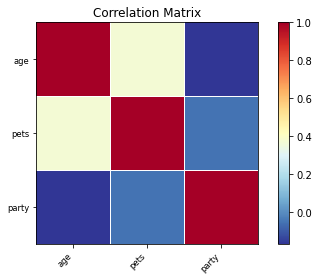

In [7]:
# Visualize data
smg.plot_corr(corr_matrix, xnames= df1.columns)
plt.show()

In [8]:
# Using pandas method
df1.corr()

,age,pets,party
age,1.000000,0.375765,-0.164214
pets,0.375765,1.000000,-0.047704
party,-0.164214,-0.047704,1.000000


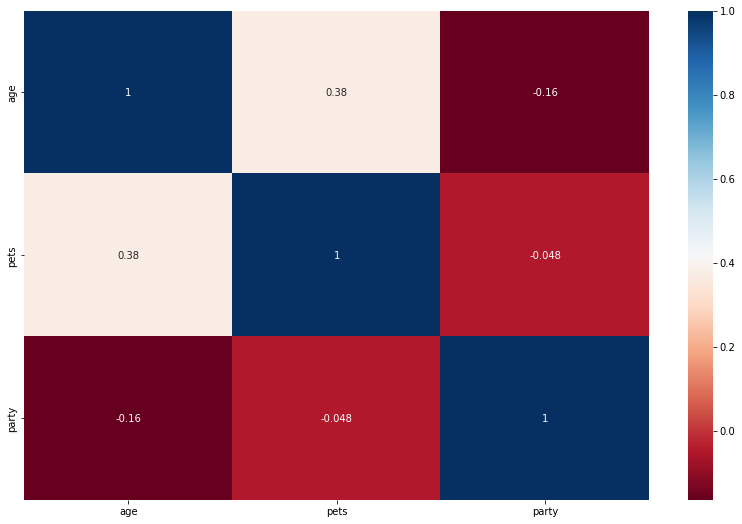

In [9]:
# Visualize result
plt.figure(figsize=(14,9))
sns.heatmap(df1.corr(), cmap = "RdBu" , annot=True)
plt.show()

In [16]:
# Using scipy module
r, p = stats.pearsonr(df1.age, df1.pets )
print("The Pearson correlation coeffcient for age vs pets relationship is :", r)
print("\nThe p value for age vs pets relationship is :", p)


# The first step involves transformation of the correlation coefficient into a Fishers’ Z-score.
r_z = np.arctanh(r)

# The corresponding standard deviation is 
se = 1/np.sqrt(df1.age.shape[0]-3)

# CI under the transformation can be calculated as 
alpha = 0.05
z = stats.norm.ppf(1-alpha/2 )
lo_z, hi_z = r_z-z*se, r_z+z*se
lo_z, hi_z

#print("The 95% confidence interval for the pearson coeffcient realtionship between age and pet is :", res.confidence_interval())

The Pearson correlation coeffcient for age vs pets relationship is : 0.3757646137983415

The p value for age vs pets relationship is : 0.0028422754334426186


(0.13237514466603745, 0.6578622749240295)

In [17]:
# Using scipy module
r,p = stats.pearsonr(df1.age, df1.party )
print("The Pearson correlation coeffcient for age vs party relationship is :", r)
print("\nThe p value for age vs party relationship is :", p)


# The first step involves transformation of the correlation coefficient into a Fishers’ Z-score.
r_z = np.arctanh(r)

# The corresponding standard deviation is 
se = 1/np.sqrt(df1.age.shape[0]-3)

# CI for r for population parameter under the transformation can be calculated as 
alpha = 0.05
z = stats.norm.ppf(1-alpha/2)
lo_z, hi_z = r_z-z*se, r_z+z*se
lo_z, hi_z

#print("The 95% confidence interval for the pearson coeffcient realtionship between age and pet is :", res.confidence_interval())

The Pearson correlation coeffcient for age vs party relationship is : -0.16421412606556718

The p value for age vs party relationship is : 0.20600567570348202


(-0.4230704392706547, 0.09164131941631107)

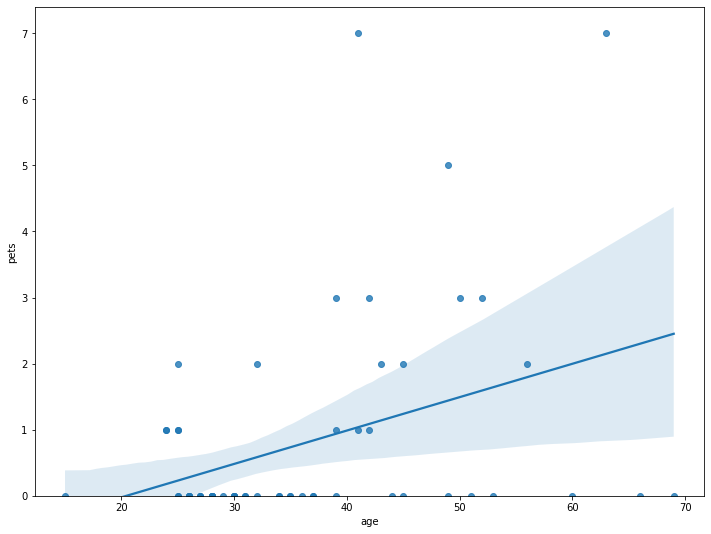

In [20]:
# Correlation line in seaborn ( Age vs pets)
plt.figure(figsize=(12,9))
sns.regplot( x= 'age', y = 'pets', data = df1)
plt.ylim(0,)
plt.show()

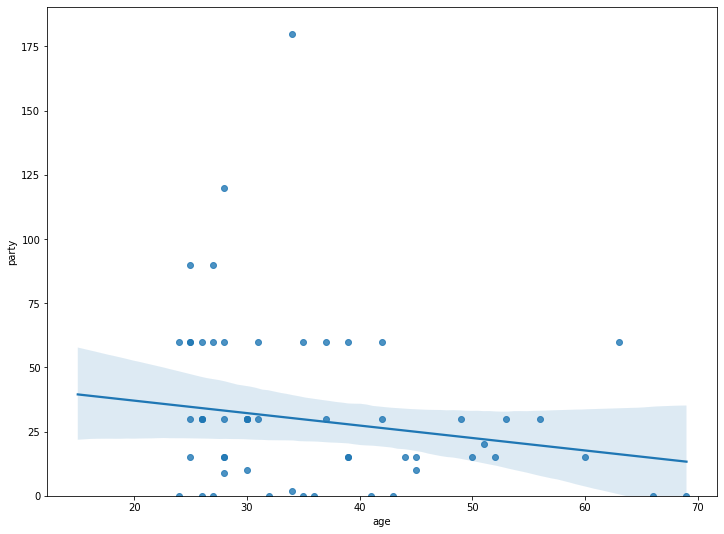

In [19]:
# Correlation line in seaborn ( Age vs party)
plt.figure(figsize=(12,9))
sns.regplot( x= 'age', y = 'party', data = df1)
plt.ylim(0,)
plt.show()